# CHANAKYA B M
## 21BCE1010

### ENSEMBLE RANDOM FOREST

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [15]:
data = pd.read_csv('titanic.csv')

data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Splitting dataset

In [16]:
# splitting input and output
missing_values = data.isna().sum()
#print("Missing values:\n", missing_values)

#eliminating NaN values

data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

data.Age = data.Age.fillna(data.Age.mean())



X = data.drop('Survived',axis='columns') # all columns except the last one
Y = data.Survived # only the last column



#convert sex male to 1 and female to 0
data['Sex'] = [1 if sex == 'male' else 0 for sex in data['Sex']]
X['Sex'] = [1 if sex == 'male' else 0 for sex in X['Sex']]

X = np.array(X)
Y = np.array(Y)



In [17]:
print(X)
print(Y)


[[ 3.          1.         22.          7.25      ]
 [ 1.          0.         38.         71.2833    ]
 [ 3.          0.         26.          7.925     ]
 ...
 [ 3.          0.         29.69911765 23.45      ]
 [ 1.          1.         26.         30.        ]
 [ 3.          1.         32.          7.75      ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 

In [18]:
data = data.dropna()


data.describe(include = 'all')

Survived      Pclass         Sex         Age        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.647587   29.699118   32.204208
std      0.486592    0.836071    0.477990   13.002015   49.693429
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%      0.000000    2.000000    0.000000   22.000000    7.910400
50%      0.000000    3.000000    1.000000   29.699118   14.454200
75%      1.000000    3.000000    1.000000   35.000000   31.000000
max      1.000000    3.000000    1.000000   80.000000  512.329200

# Correaltion Matrix

<Axes: >

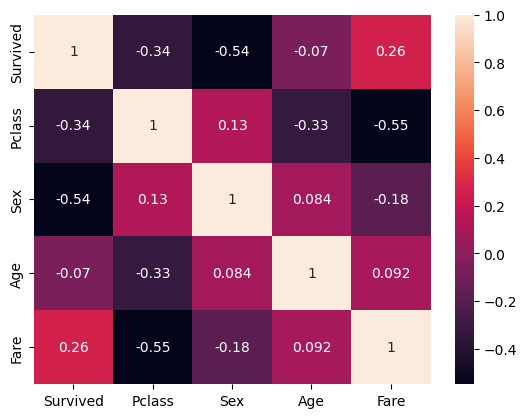

In [19]:
import seaborn as sns
data_corr = data.corr()
sns.heatmap(data_corr,annot=True)

## Train & Test


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

(623, 4)
(268,)


# model training - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

# Instantiate the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.7910447761194029
Precision: 0.7841659363131755
Recall: 0.7806243148116092
F1 Score: 0.7822023567655425


# Plotting Performance metrics

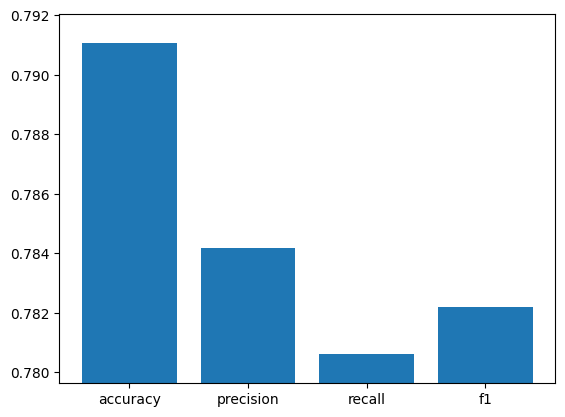

In [24]:
import matplotlib.pyplot as plt

metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
names = ["accuracy", "precision", "recall", "f1"]

plt.ylim(min(metrics) - 0.001, max(metrics) + 0.001)
plt.bar(names, metrics)

plt.show()